In [1]:
import pandas as pd
import sys
import os
sys.path.insert(0,os.path.abspath("../scripts"))
import eda_functions as eda
import importlib
importlib.reload(eda)


<module 'eda_functions' from 'c:\\Users\\HP\\Desktop\\TenX\\solar-radiation-data\\scripts\\eda_functions.py'>

In [2]:
#Load data
df = eda.load_data('../data/raw/sierraleone-bumbuna.csv')

In [3]:
#Summary Statistics
summary_stats = eda.summary_statistics(df)
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [4]:
#Data Quality check
quality_check = eda.data_quality_check(df, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'])
print(quality_check)

{'missing_values': Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64, 'negative_values': GHI       261135
DNI       266352
DHI       263128
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64}


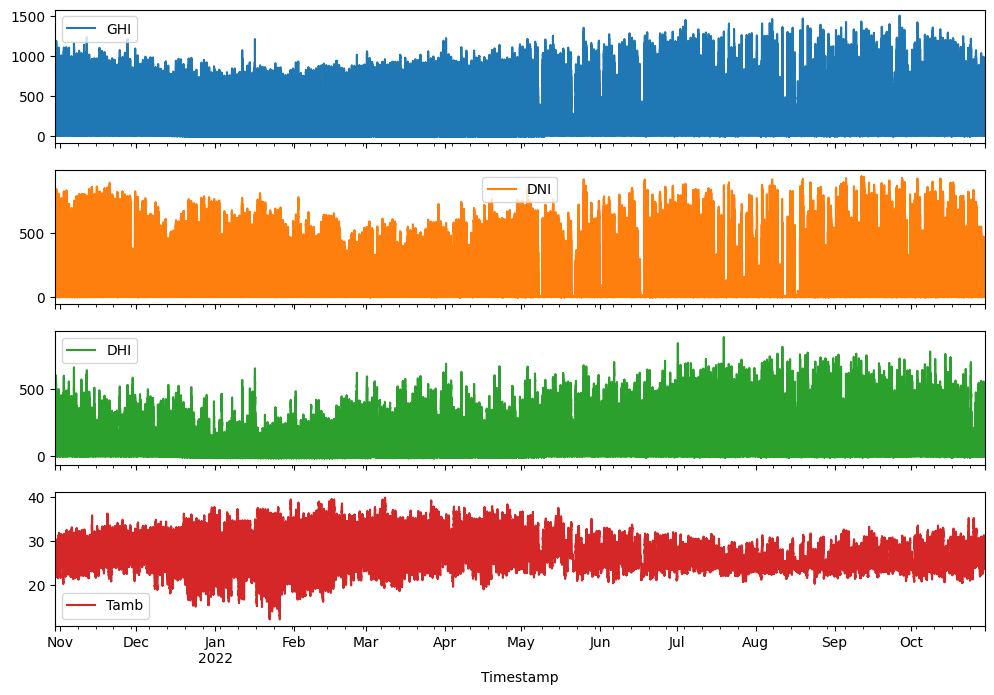

In [5]:
#Time Series Analysis
eda.time_series_analysis(df, date_column='Timestamp', value_columns=['GHI', 'DNI', 'DHI', 'Tamb'])

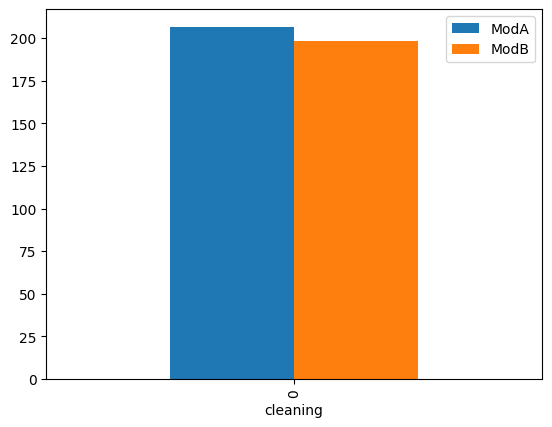

In [6]:
#Impact of Cleaning
eda.cleaning_impact(df, cleaning_col='Cleaning', mod_columns=['ModA', 'ModB'])

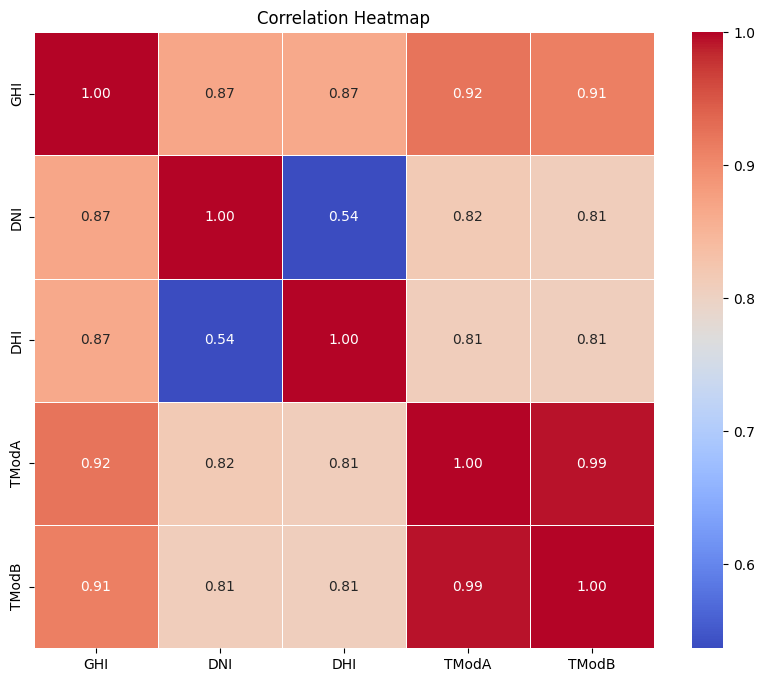

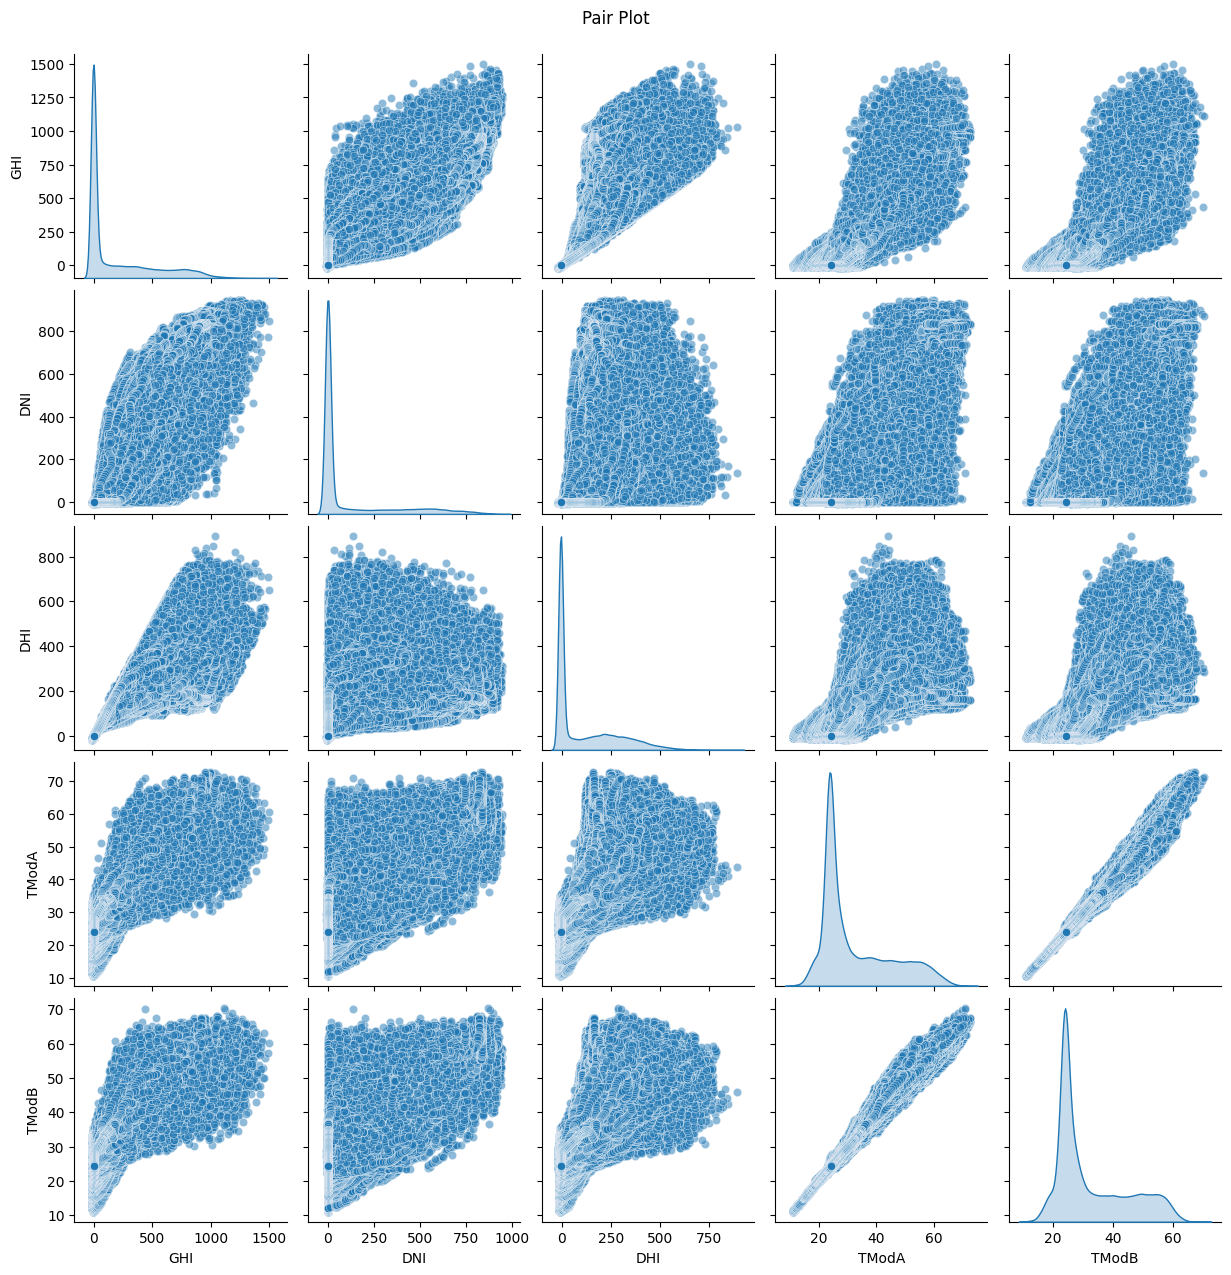

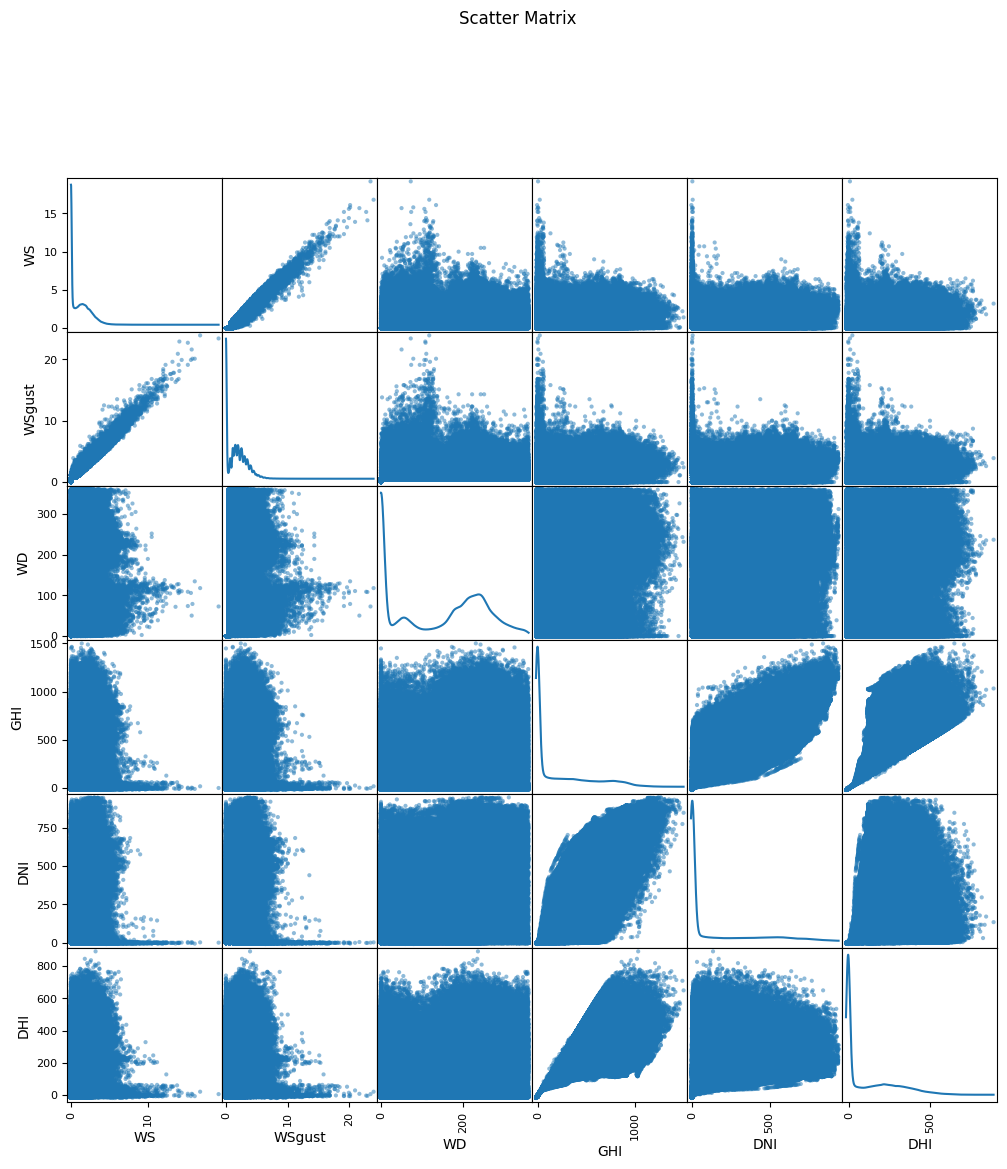

In [7]:
#Correlation analysis

# Correlation Heatmap
eda.plot_correlation_heatmap(df,columns=['GHI', 'DNI', 'DHI', 'TModA', 'TModB'])
# Pair Plot
eda.plot_pairplot(df,columns= ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'])
# Scatter Matrix
eda.plot_scatter_matrix(df, columns=['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI'])


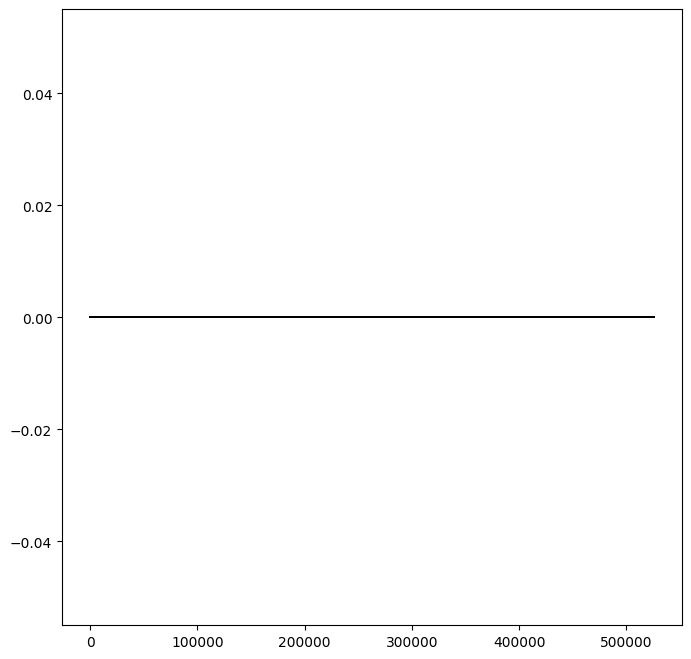

In [8]:
#Wind Analysis
eda.wind_analysis(df, ws_col='WS', wd_col='WD')

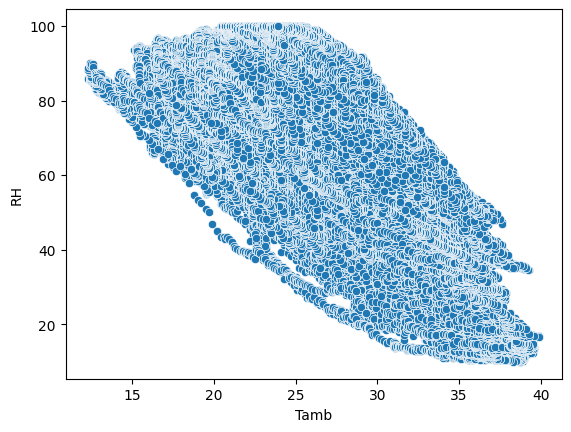

In [9]:
#Temperature Analysis
eda.temperature_analysis(df, temp_col='Tamb', rh_col='RH')

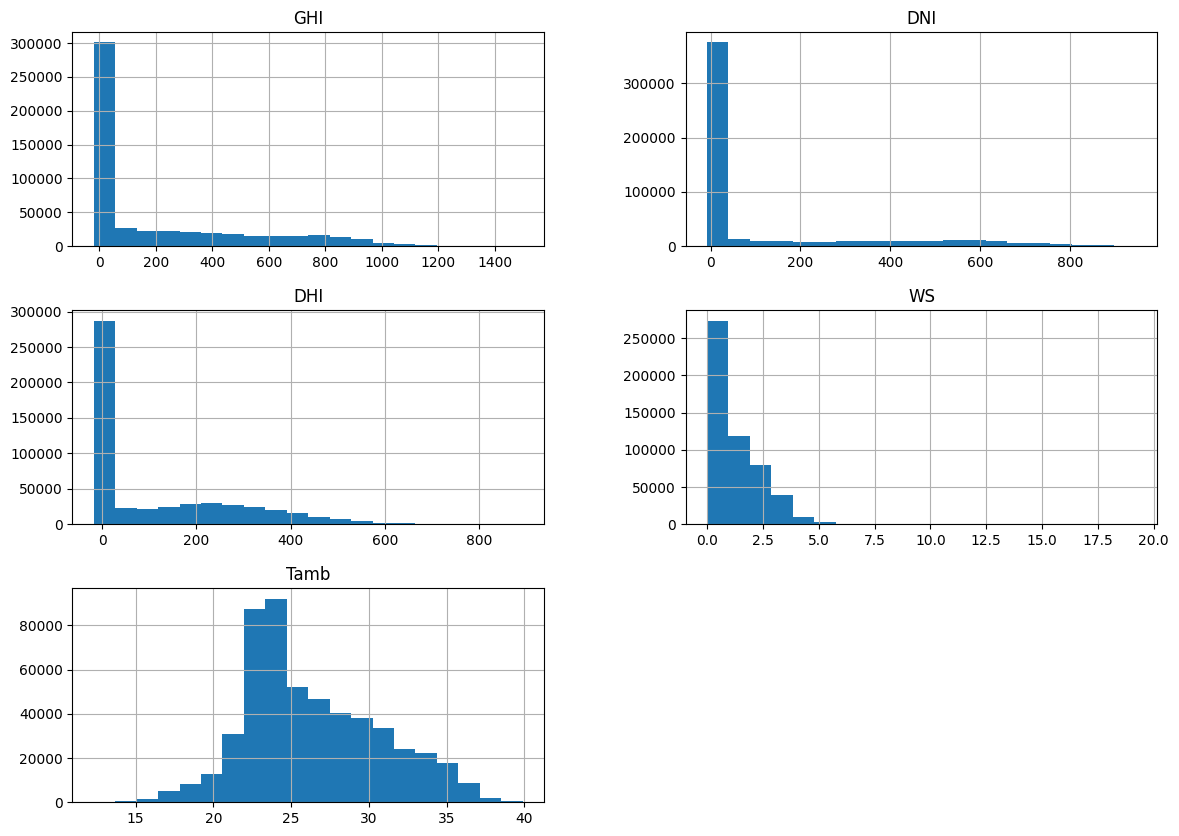

In [10]:
#Histograms
eda.histograms(df, columns=['GHI', 'DNI', 'DHI', 'WS', 'Tamb'])

In [11]:
#Z-Score Analysis
outliers = eda.z_score_analysis(df, columns=['GHI', 'DNI', 'DHI'])
print("Outliers:", outliers)


Outliers: (array([   653,    654,    655, ..., 519237, 519238, 519239]), array([2, 2, 2, ..., 1, 1, 1]))


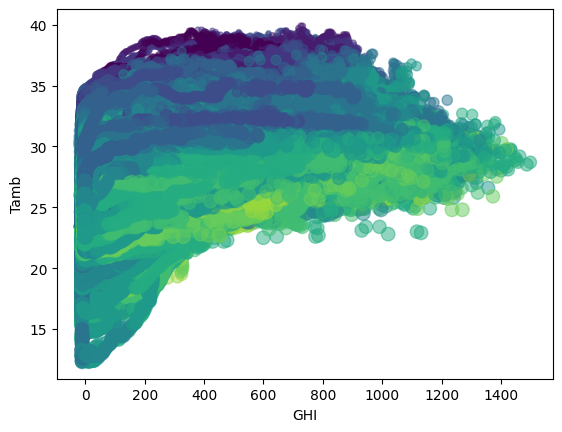

In [12]:
#Bubble Charts
eda.bubble_chart(df, x_col='GHI', y_col='Tamb', size_col='RH', color_col='BP')

In [13]:
#Data Cleaning

df_raw = pd.read_csv('../data/raw/sierraleone-bumbuna.csv')
df_clean = eda.clean_data(df_raw)
df_clean.to_csv('../data/processed/sierraleone-bumbuna.csv', index=False)